# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [2]:
import numpy as np

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [10]:
data = pd.merge(client_df, price_df, on = 'id')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

#### there is no missing values in this dataset

In [11]:
data['date_activ']= pd.to_datetime(data['date_activ'])

In [12]:
data['year_active'] = data['date_activ'].dt.year

In [13]:
data['year_active']

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
175144    2009
175145    2009
175146    2009
175147    2009
175148    2009
Name: year_active, Length: 175149, dtype: int64

### Churn Percentage

In [136]:
churn=data[['id','churn']]
churn.columns=['Companies','churn']
total=churn['churn'].count()
churn_count = churn['churn'].sum()
churn_percentage=(churn_count/total)*100
print(churn_percentage, churn_count, total)

9.707734557433955 17003 175149


In [137]:
churn['churn'].sum()

17003

In [138]:
churn.columns=['Companies','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100
churn_percentage

,Companies
churn,
0,90.292265
1,9.707735


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [139]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

In [140]:
year_active = data['year_active']
churn = data['churn']
year_active_data = pd.concat([year_active, churn], axis=1)

                

In [141]:
year_active_data

,year_active,churn
0,1970-01-01 00:00:00.000002013,1
1,1970-01-01 00:00:00.000002013,1
2,1970-01-01 00:00:00.000002013,1
3,1970-01-01 00:00:00.000002013,1
4,1970-01-01 00:00:00.000002013,1
...,...,...
175144,1970-01-01 00:00:00.000002009,0
175145,1970-01-01 00:00:00.000002009,0
175146,1970-01-01 00:00:00.000002009,0
175147,1970-01-01 00:00:00.000002009,0


In [142]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )


Text(0, 0.5, 'Company base(%)')

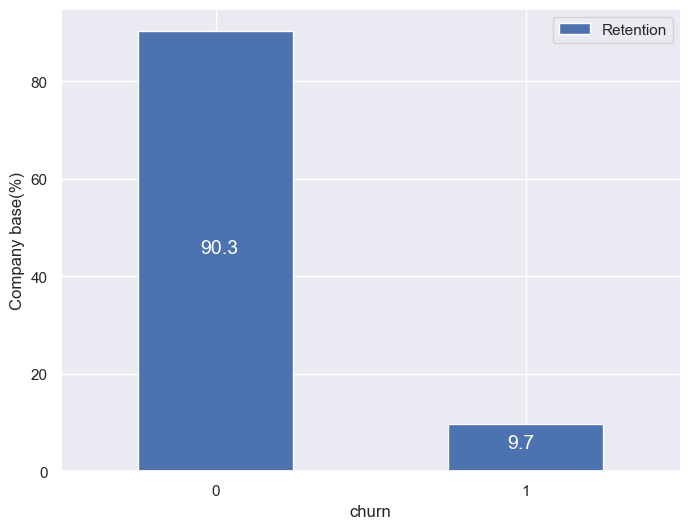

In [144]:
ax=churn_percentage.plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')

In [29]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, rot=0)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

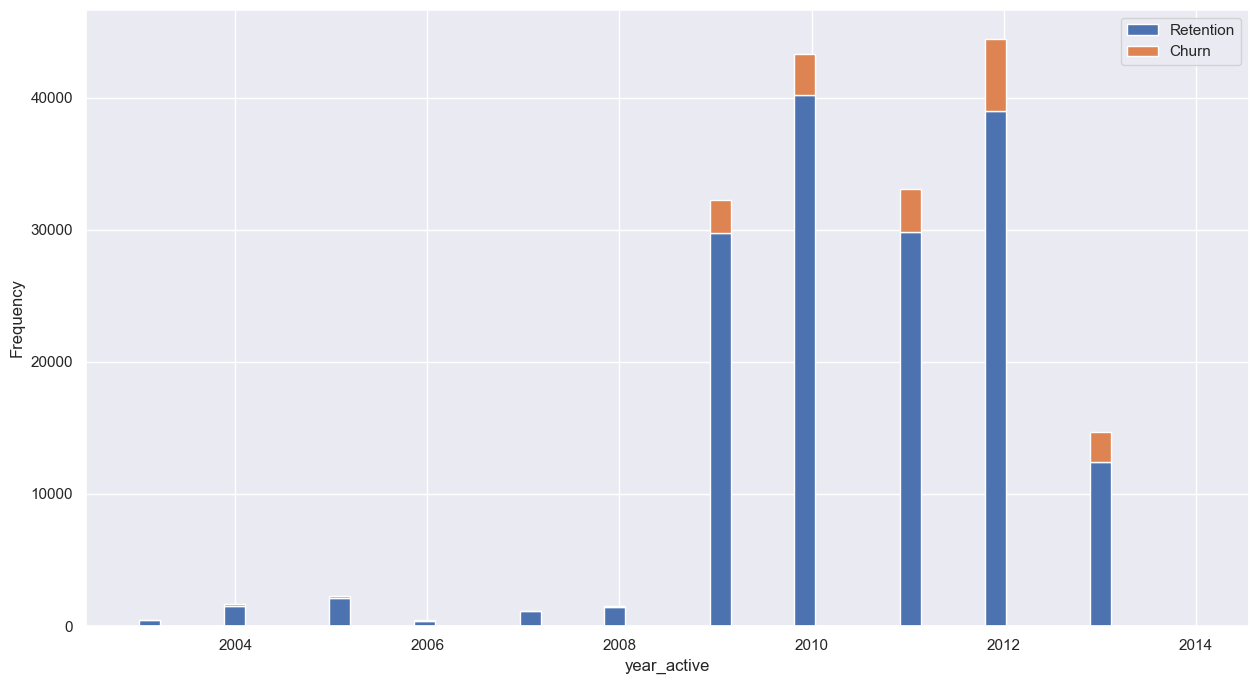

In [37]:
fig, axs = plt.subplots(nrows=1, figsize=(15, 8))
plot_distribution(data, 'year_active', axs)

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

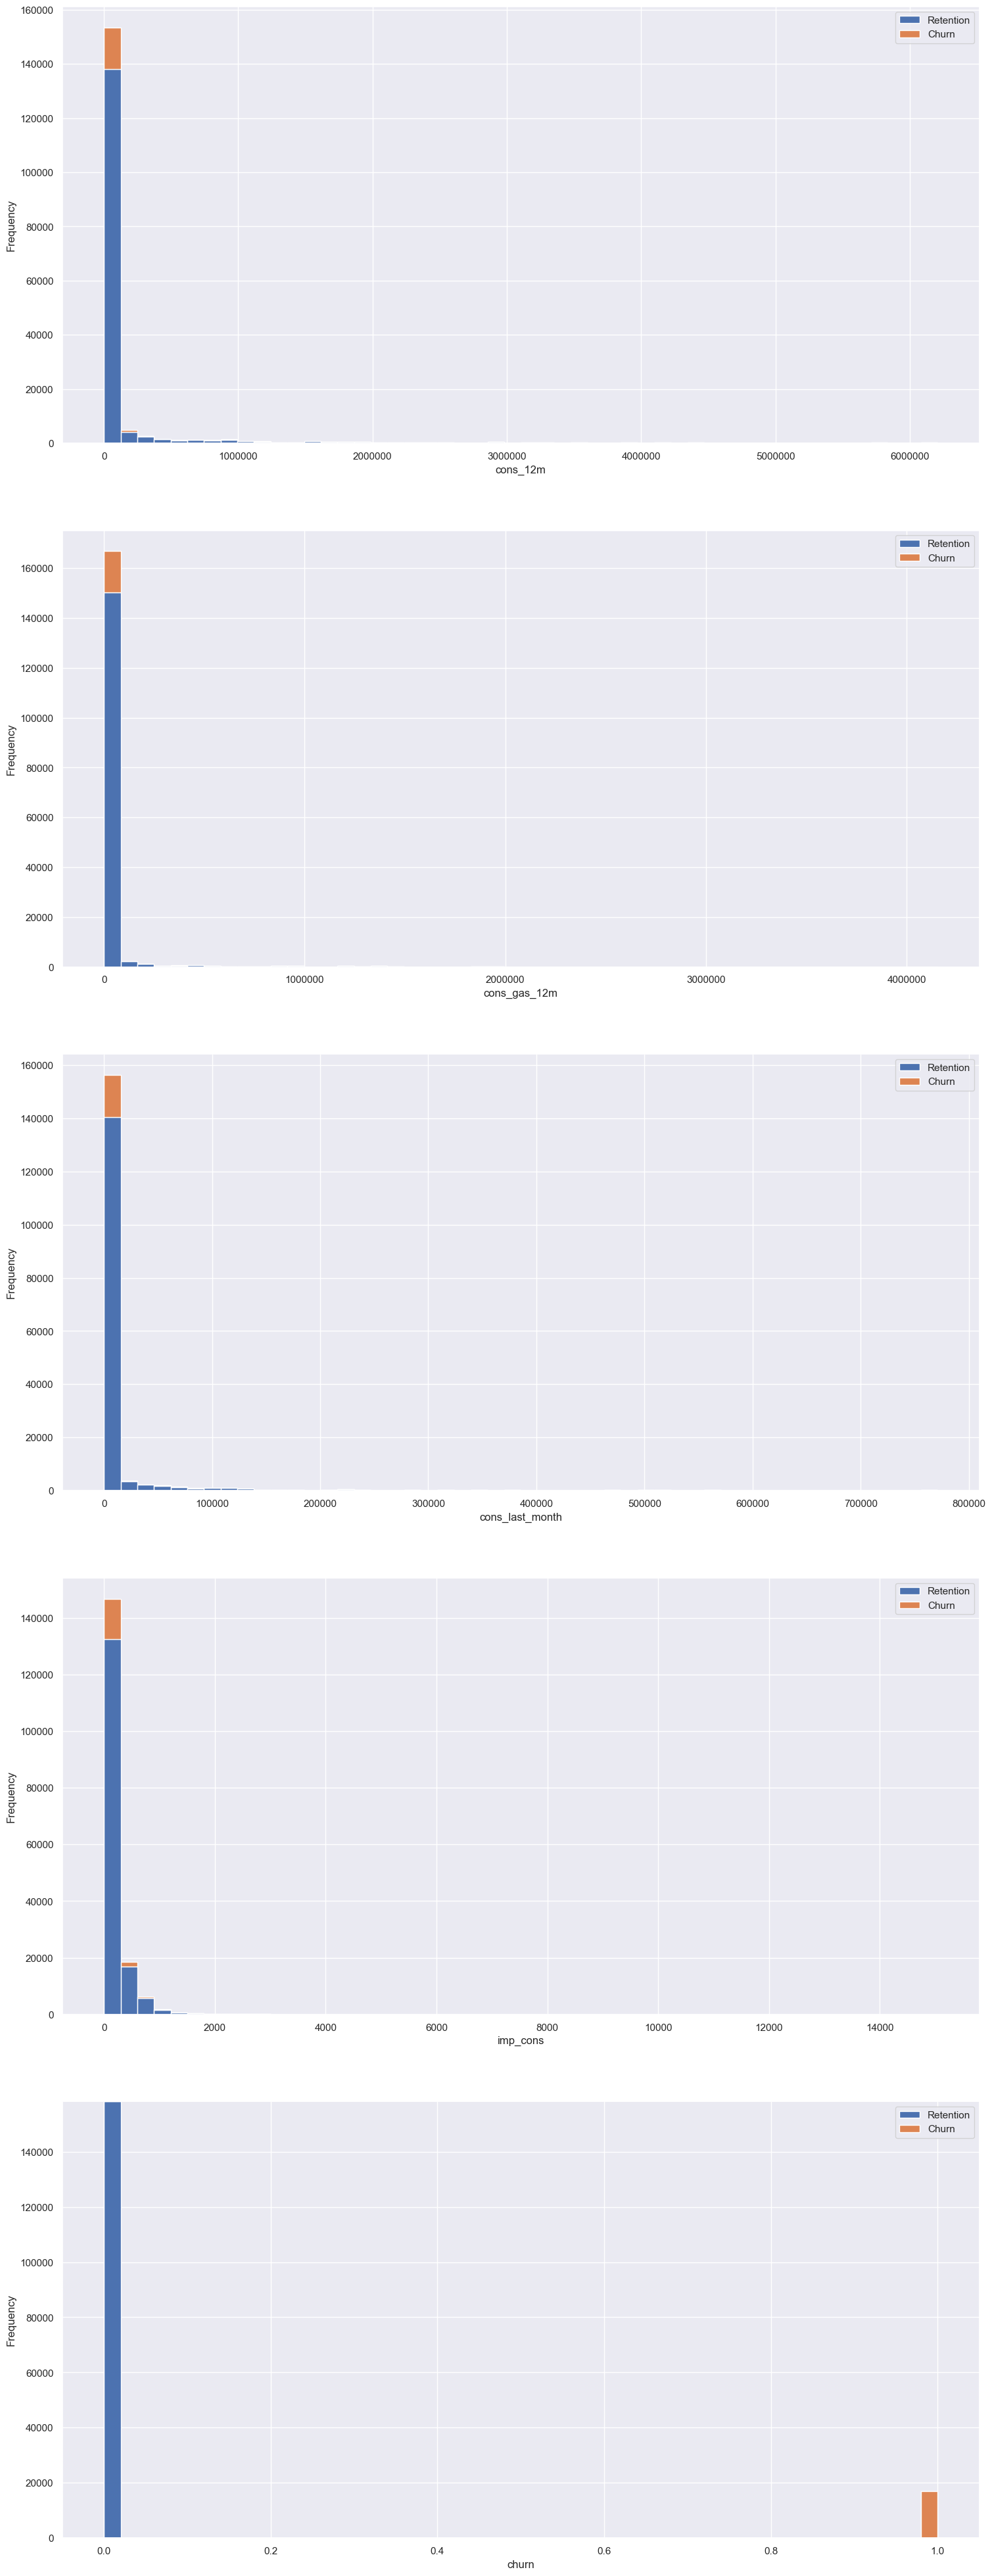

In [46]:
consumption = data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=5, figsize=(18, 50))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption, 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])
# plot_distribution(consumption, 'has_gas', axs[4])
plot_distribution(consumption, 'churn', axs[4])

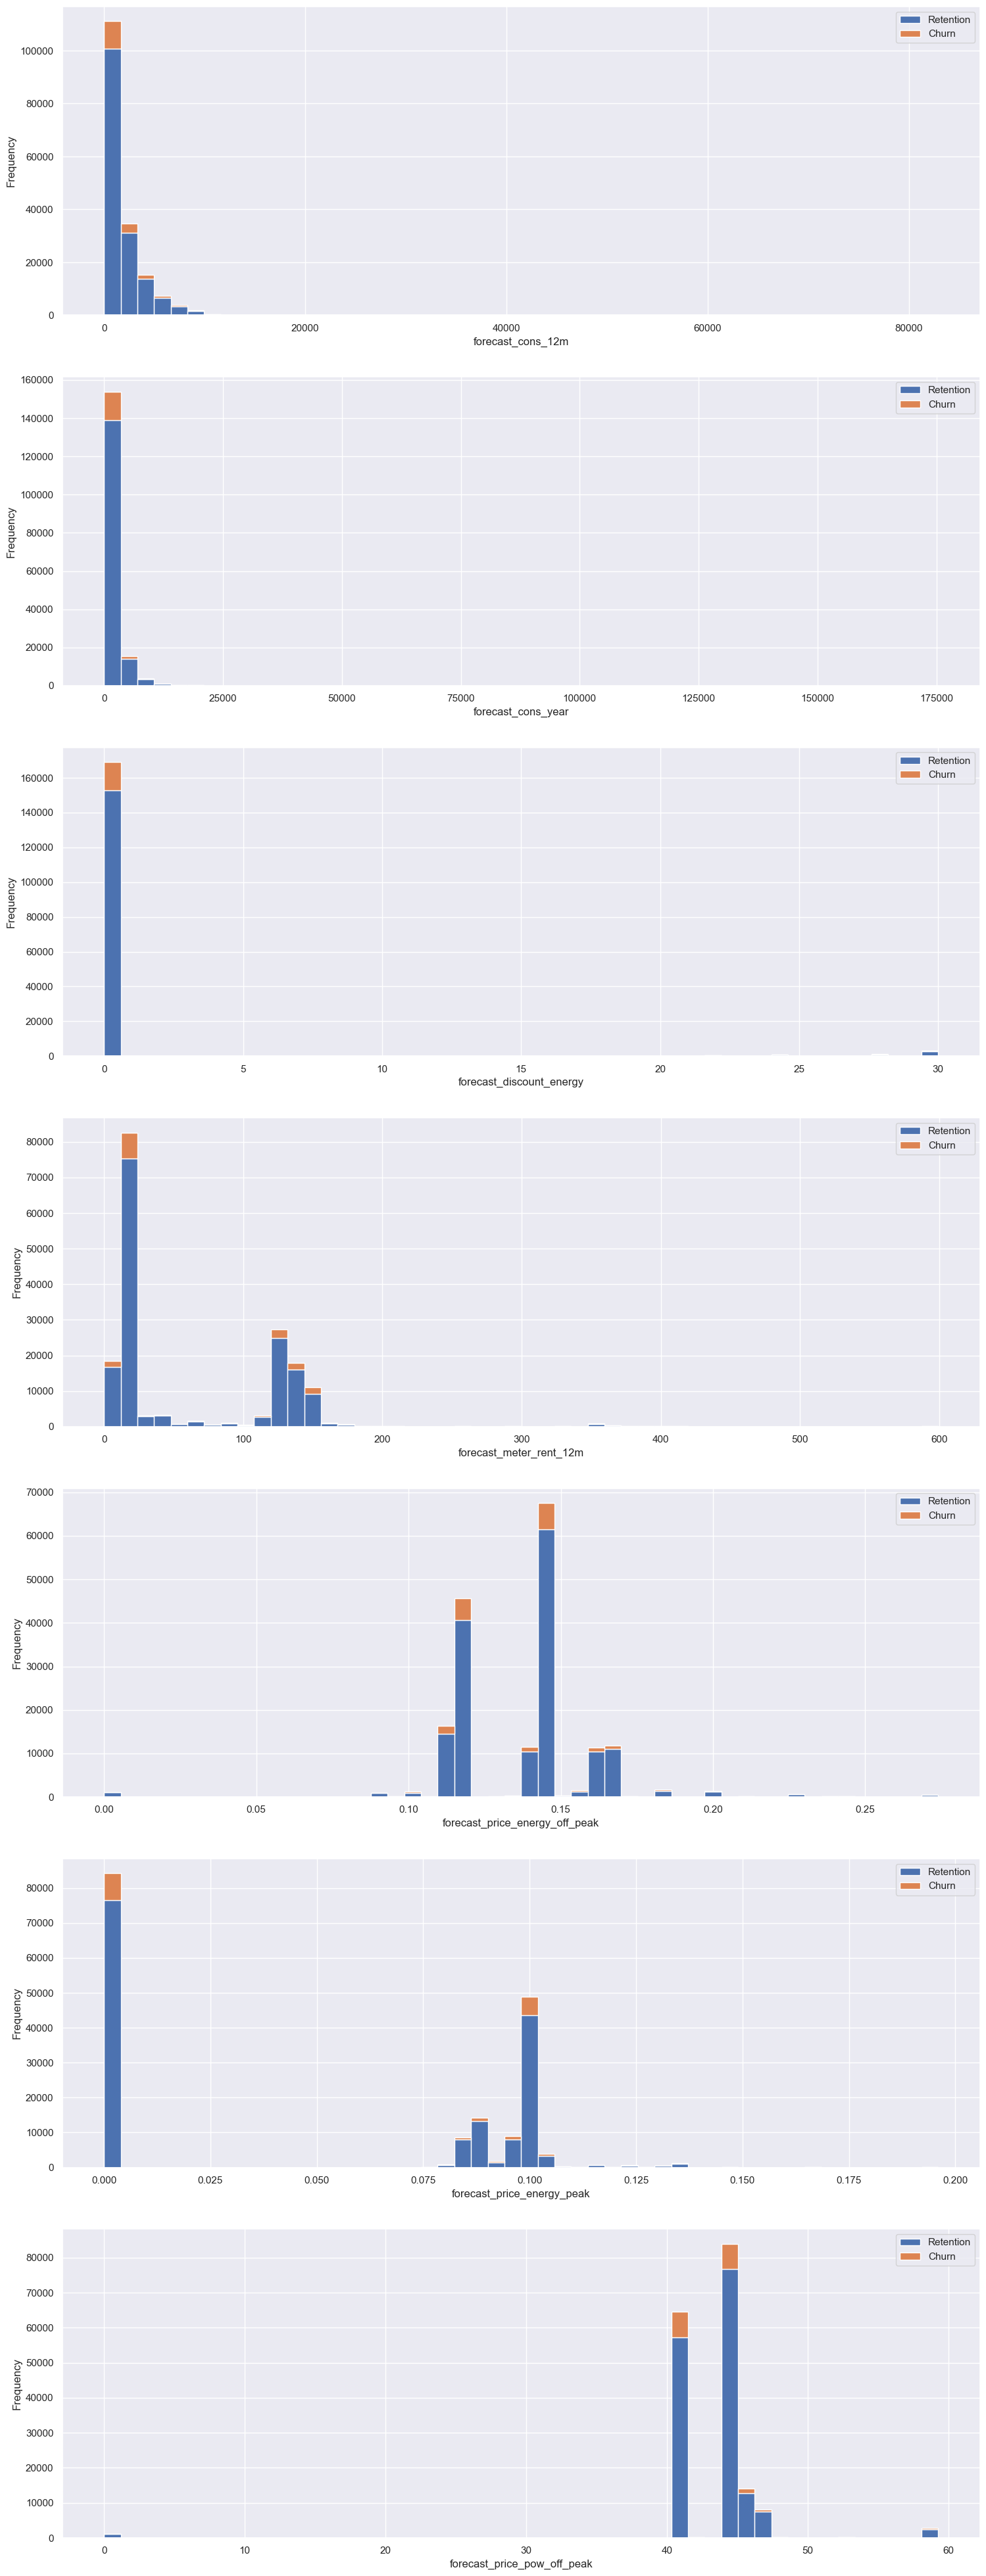

In [47]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(data, "forecast_cons_12m", axs[0])
plot_distribution(data, "forecast_cons_year", axs[1])
plot_distribution(data, "forecast_discount_energy", axs[2])
plot_distribution(data, "forecast_meter_rent_12m", axs[3])
plot_distribution(data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(data, "forecast_price_energy_peak", axs[5])
plot_distribution(data, "forecast_price_pow_off_peak", axs[6])

In [48]:
data.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,year_active
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,2013
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,2013
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2013
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2013
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2013
5,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-06-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2013
6,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-07-01,0.125640,0.103963,0.073873,40.728885,24.437330,16.291555,2013
7,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-08-01,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555,2013
8,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-09-01,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555,2013
9,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-10-01,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555,2013


In [49]:
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'year_active'],
      dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_13724\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

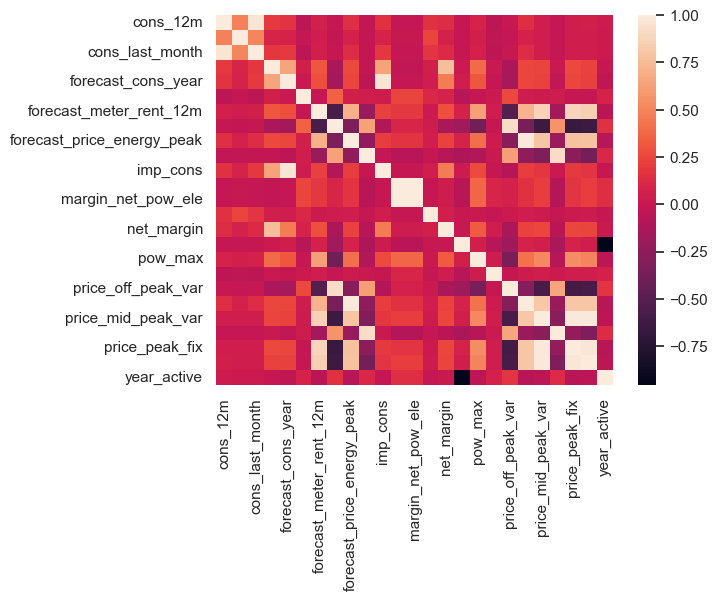

In [50]:
sns.heatmap(data.corr())

##### The above plot shows the correlation betweeen price variables with each other and with churn, however, the correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change.

In [53]:
price = ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']

1
2
3
4
5
6


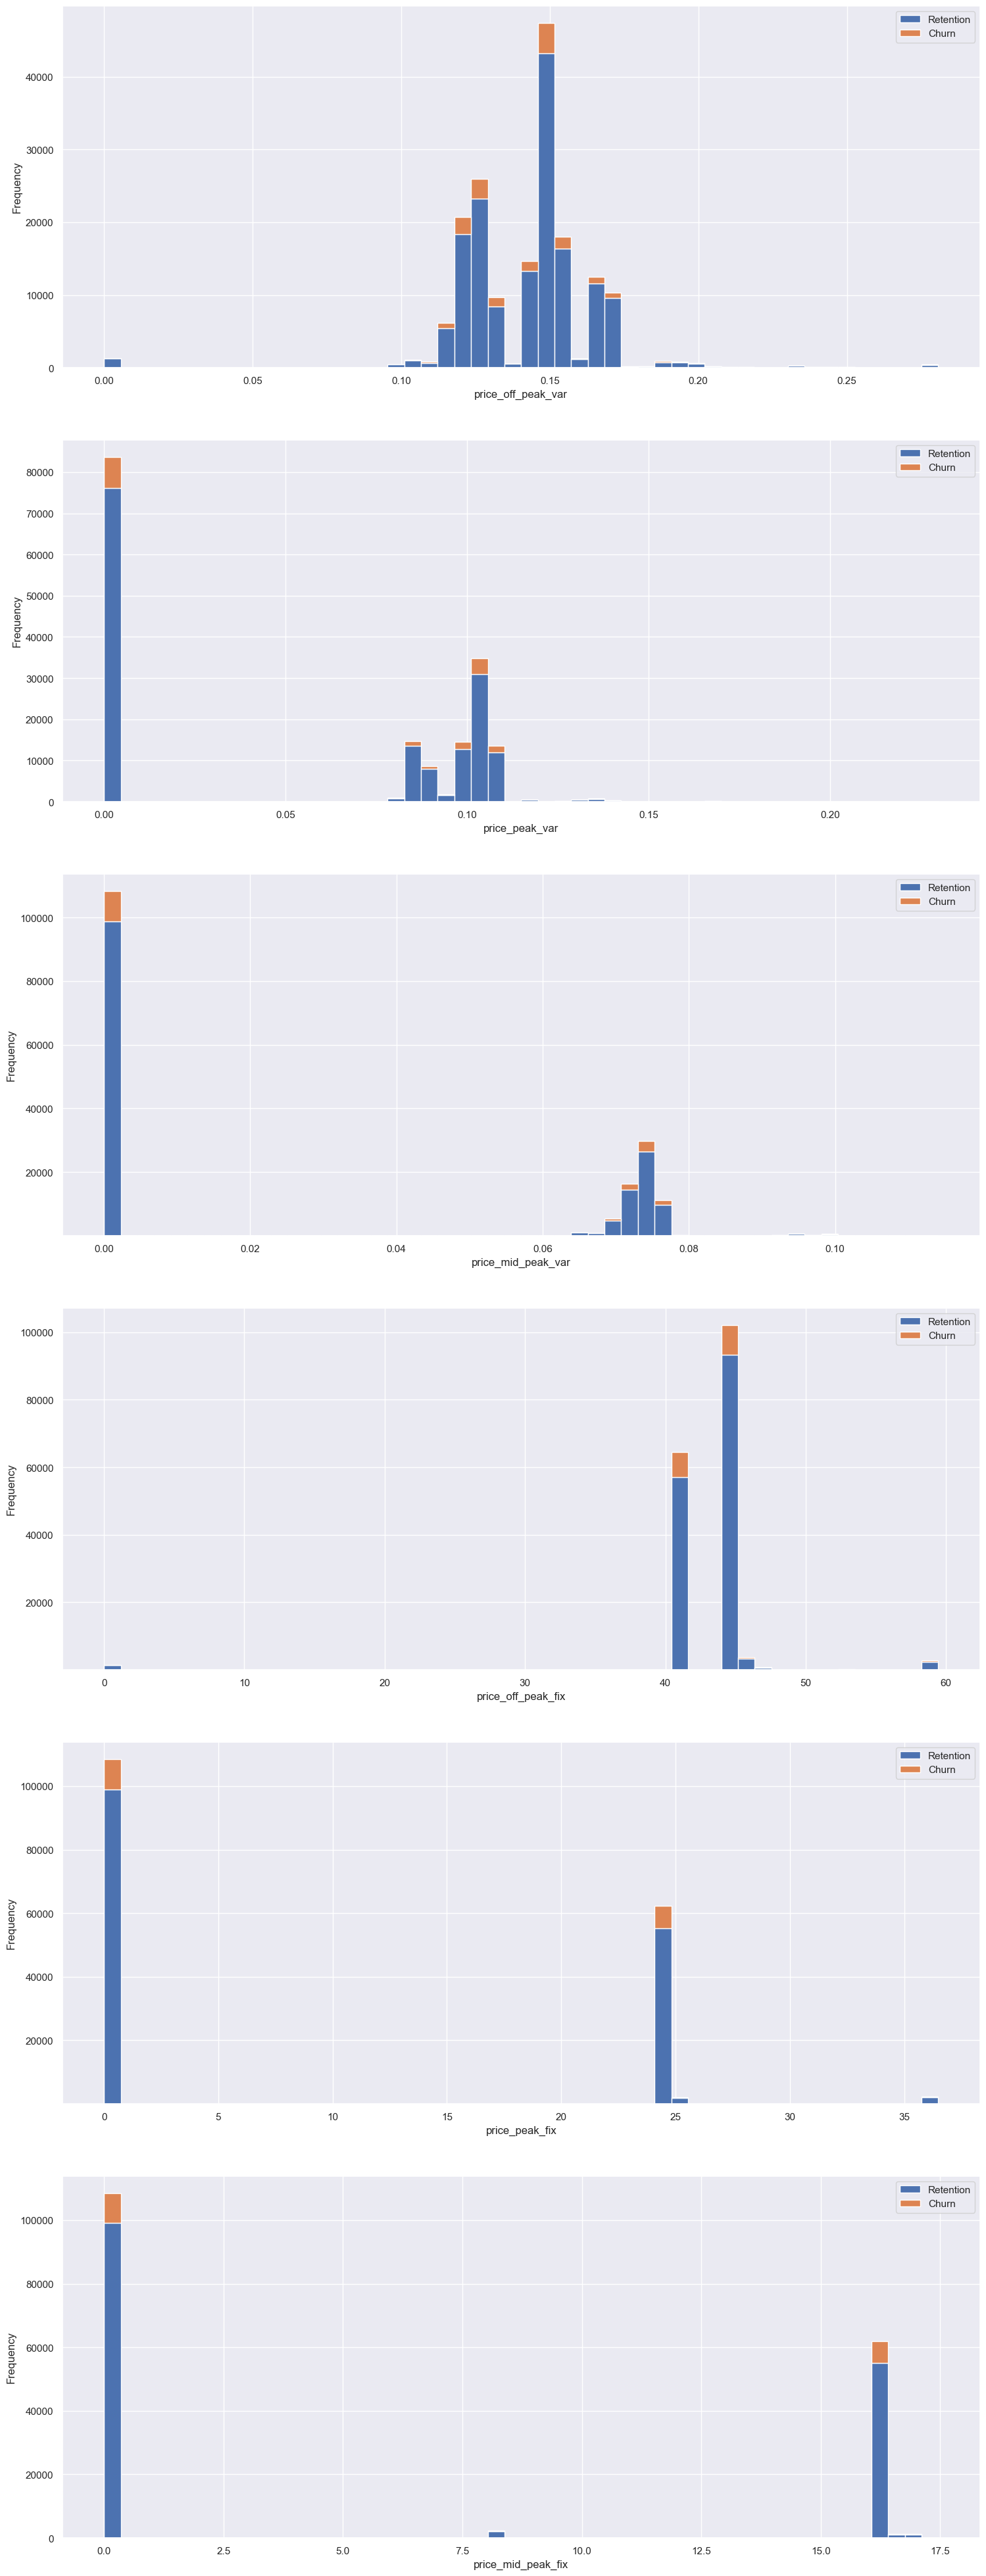

In [58]:
fig, axs = plt.subplots(nrows=6, figsize=(18,50))

# Plot histogram
iteration = 0
for var in price:
    plot_distribution(data, var, axs[iteration])
    iteration= iteration+1
    print(iteration)


##### There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices. So, I will analyse price sensivity only based on off-peak prices

In [59]:
# List of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes !='O']

print("number of numerical features {}".format(len(numerical_features)))
data[numerical_features].head()

number of numerical features 26


,cons_12m,cons_gas_12m,cons_last_month,date_activ,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,year_active
0,0,54946,0,2013-06-15,0.0,0,0.0,1.78,0.114481,0.098142,...,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,2013
1,0,54946,0,2013-06-15,0.0,0,0.0,1.78,0.114481,0.098142,...,3,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,2013
2,0,54946,0,2013-06-15,0.0,0,0.0,1.78,0.114481,0.098142,...,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2013
3,0,54946,0,2013-06-15,0.0,0,0.0,1.78,0.114481,0.098142,...,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2013
4,0,54946,0,2013-06-15,0.0,0,0.0,1.78,0.114481,0.098142,...,3,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2013


In [115]:
year_feature = [feature for feature in data.columns if 'date' in feature or 'year' in feature]
print(year_feature)

['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_year', 'num_years_antig', 'price_date', 'year_active']


In [117]:
year_feature.remove('num_years_antig')
year_feature.remove('year_active')

In [119]:
discrete_variables = [feature for feature in numerical_features if len(data[feature].unique())<56
                      and feature not in year_feature+['ID']]
print("Discrete variables {}".format(discrete_variables))

for feature in discrete_variables:
    print(feature)

Discrete variables ['forecast_discount_energy', 'forecast_price_pow_off_peak', 'nb_prod_act', 'num_years_antig', 'churn', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'year_active']
forecast_discount_energy
forecast_price_pow_off_peak
nb_prod_act
num_years_antig
churn
price_off_peak_fix
price_peak_fix
price_mid_peak_fix
year_active


In [120]:
len(data['price_off_peak_fix'].unique())

55

In [121]:
data[discrete_variables].head()

,forecast_discount_energy,forecast_price_pow_off_peak,nb_prod_act,num_years_antig,churn,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,year_active
0,0.0,40.606701,2,1970-01-01 00:00:00.000000003,1,40.565969,24.339581,16.226389,1970-01-01 00:00:00.000002013
1,0.0,40.606701,2,1970-01-01 00:00:00.000000003,1,40.565969,24.339581,16.226389,1970-01-01 00:00:00.000002013
2,0.0,40.606701,2,1970-01-01 00:00:00.000000003,1,40.565973,24.339578,16.226383,1970-01-01 00:00:00.000002013
3,0.0,40.606701,2,1970-01-01 00:00:00.000000003,1,40.565973,24.339578,16.226383,1970-01-01 00:00:00.000002013
4,0.0,40.606701,2,1970-01-01 00:00:00.000000003,1,40.565973,24.339578,16.226383,1970-01-01 00:00:00.000002013


In [122]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_variables+['Id']+year_feature]
print(" Number of Continuous feature: {}".format(len(continuous_features)))

 Number of Continuous feature: 15


In [123]:
data[continuous_features]

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var
0,0,54946,0,0.00,1.78,0.114481,0.098142,0.0,25.44,25.44,678.99,43.648,0.125976,0.103395,0.071536
1,0,54946,0,0.00,1.78,0.114481,0.098142,0.0,25.44,25.44,678.99,43.648,0.125976,0.103395,0.071536
2,0,54946,0,0.00,1.78,0.114481,0.098142,0.0,25.44,25.44,678.99,43.648,0.125976,0.103395,0.071536
3,0,54946,0,0.00,1.78,0.114481,0.098142,0.0,25.44,25.44,678.99,43.648,0.125976,0.103395,0.071536
4,0,54946,0,0.00,1.78,0.114481,0.098142,0.0,25.44,25.44,678.99,43.648,0.125976,0.103395,0.071536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,8730,0,0,762.41,1.07,0.167086,0.088454,0.0,11.84,11.84,96.34,10.392,0.165962,0.086905,0.000000
175145,8730,0,0,762.41,1.07,0.167086,0.088454,0.0,11.84,11.84,96.34,10.392,0.165962,0.086905,0.000000
175146,8730,0,0,762.41,1.07,0.167086,0.088454,0.0,11.84,11.84,96.34,10.392,0.165962,0.086905,0.000000
175147,8730,0,0,762.41,1.07,0.167086,0.088454,0.0,11.84,11.84,96.34,10.392,0.165962,0.086905,0.000000


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


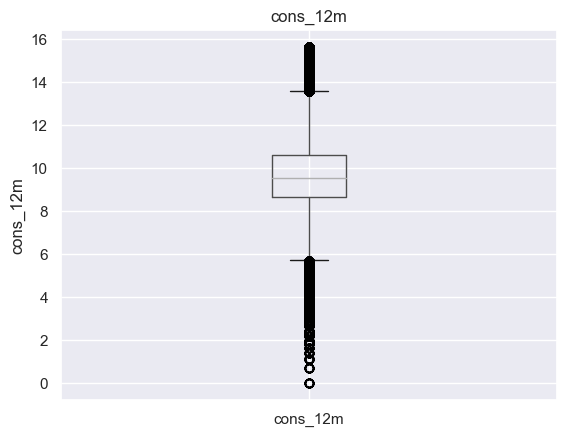

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


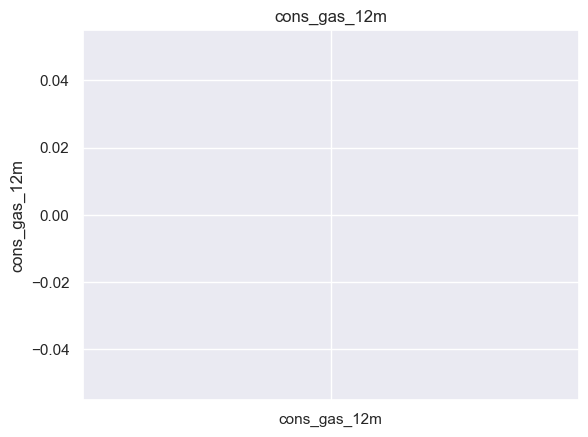

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


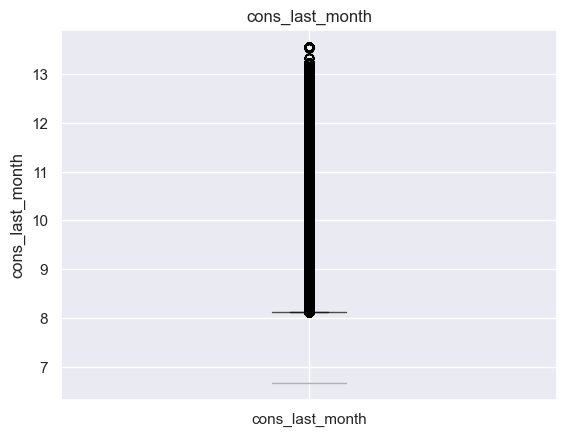

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


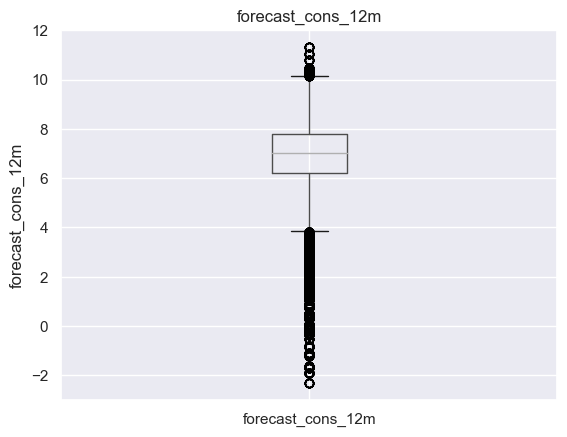

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


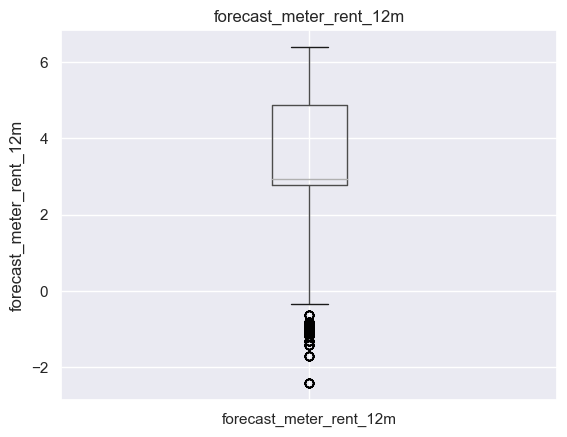

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


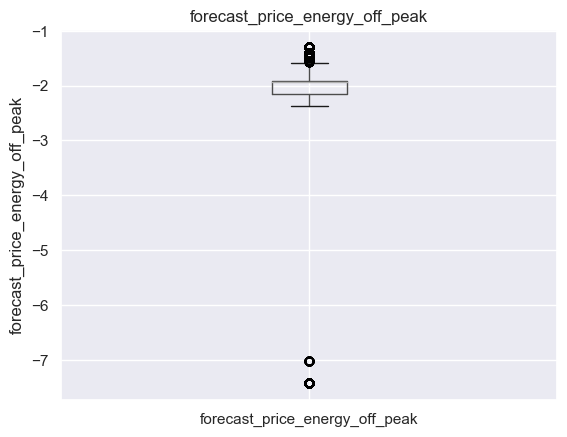

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


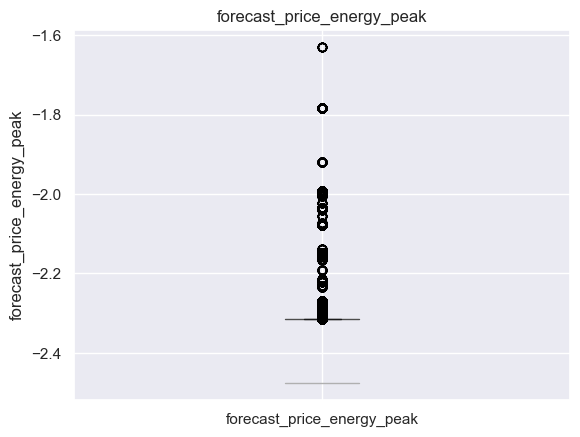

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


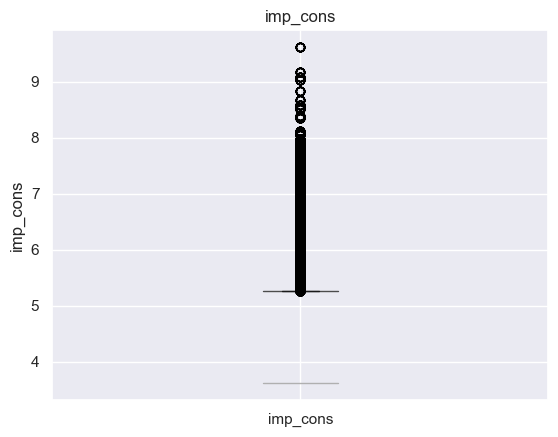

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


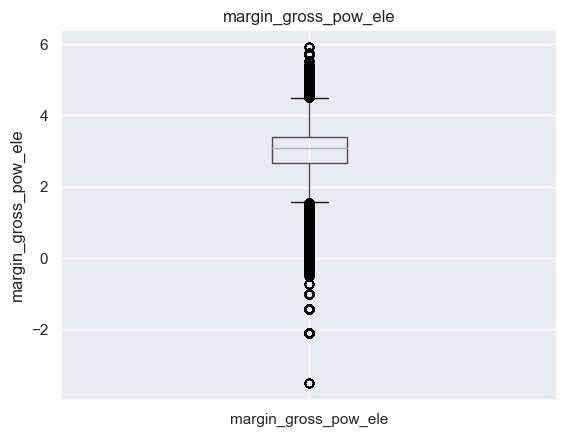

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


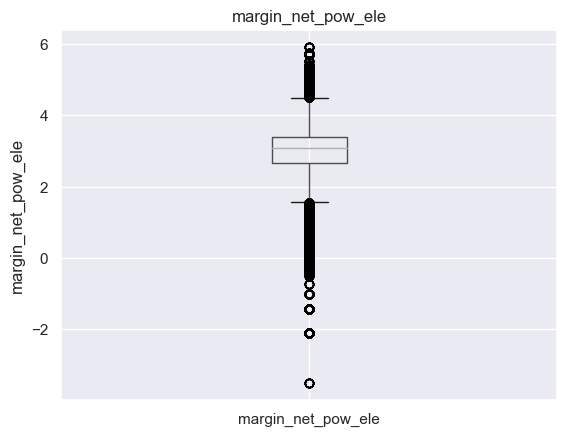

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


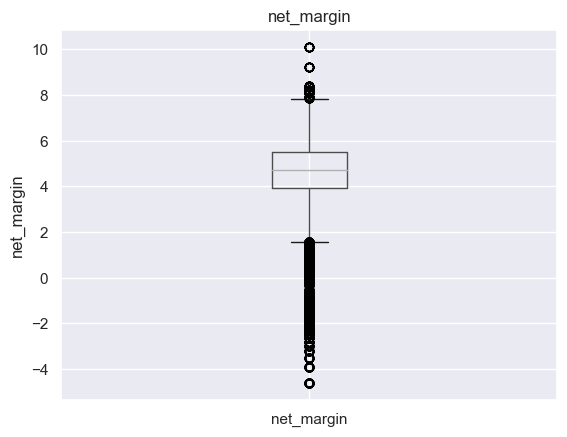

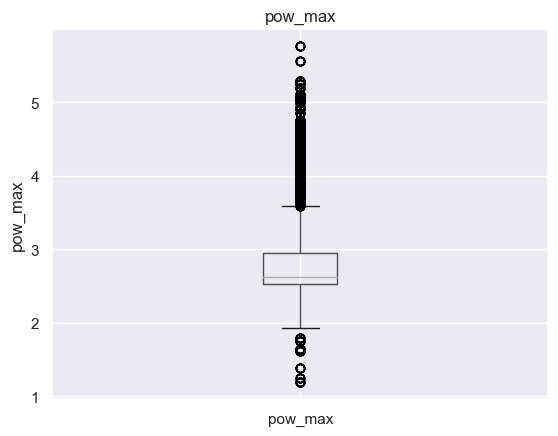

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


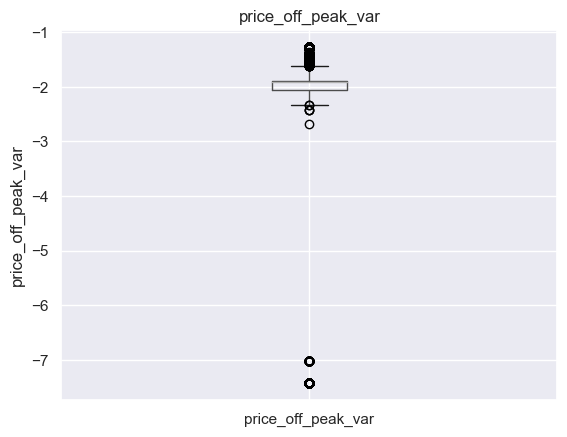

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


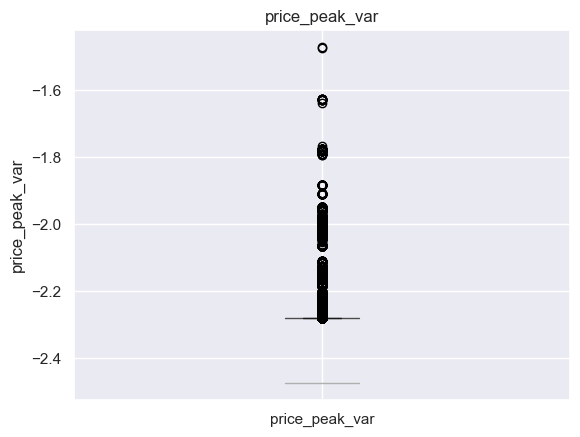

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


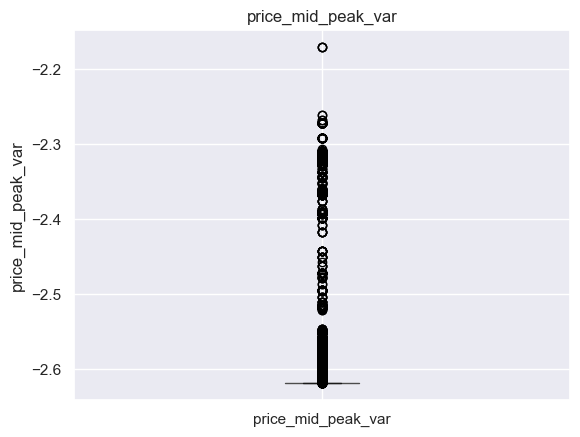

In [124]:
for feature in continuous_features:
        data1 = data.copy()
        data1[feature] = np.log(data1[feature])
        data1.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

##### This data contains a large number of outliers that we will address in feature engineering

In [125]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O' and feature not in year_feature+['id']]
data[categorical_features].head()

,channel_sales,has_gas,origin_up
0,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw
1,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw
2,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw
3,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw
4,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw


In [126]:
for feature in categorical_features:
    print(data[feature].unique())

['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
['t' 'f']
['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' 'MISSING'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']


In [127]:
data[year_feature].head()

,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,price_date
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1970-01-01,2015-01-01
1,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1970-01-01,2015-02-01
2,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1970-01-01,2015-03-01
3,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1970-01-01,2015-04-01
4,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1970-01-01,2015-05-01


In [128]:
for feature in year_feature:
    data[feature] = pd.to_datetime(data[feature])
    data[feature+'year_av'] = data[feature].dt.year

In [131]:
year_av = [feature for feature in data.columns if 'year_av' in feature]

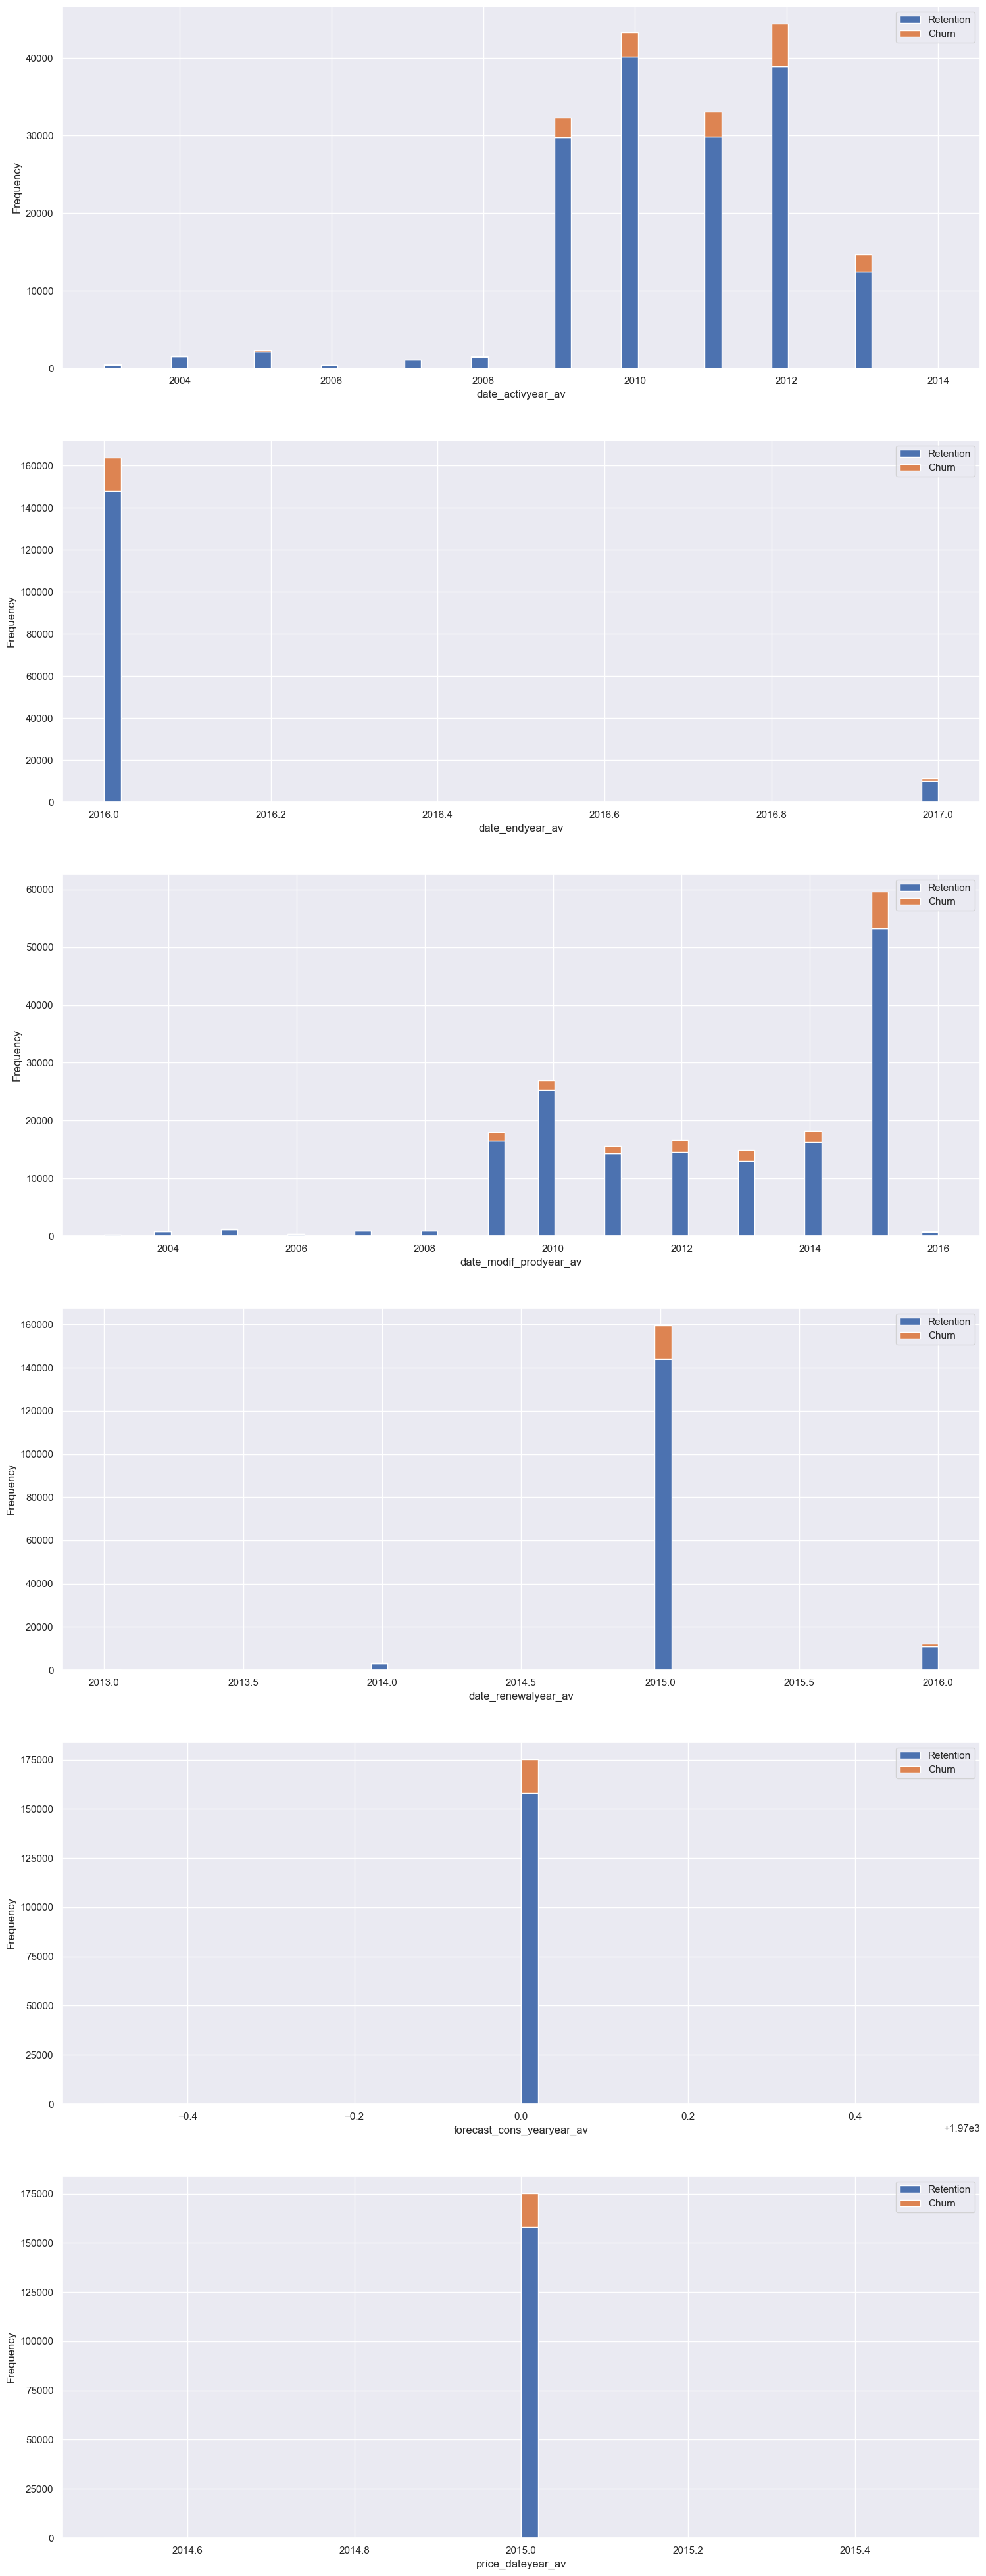

In [133]:
fig, axs = plt.subplots(nrows=6, figsize=(18,50))
it = 0
for feature in year_av:
    plot_distribution(data, feature, axs[it])
    it = it+1
    

##### Most of the data is centered around the year 2015 and price date year also 2015 

## Hypothesis Investigation

In [12]:
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_2752\2508530379.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_year = price_df.groupby(['id']).mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_2752\2508530379.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_2752\2508530379.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only 

In [13]:
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [14]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,0


C:\Users\user\AppData\Local\Temp\ipykernel_2752\3672291108.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_churn.corr()


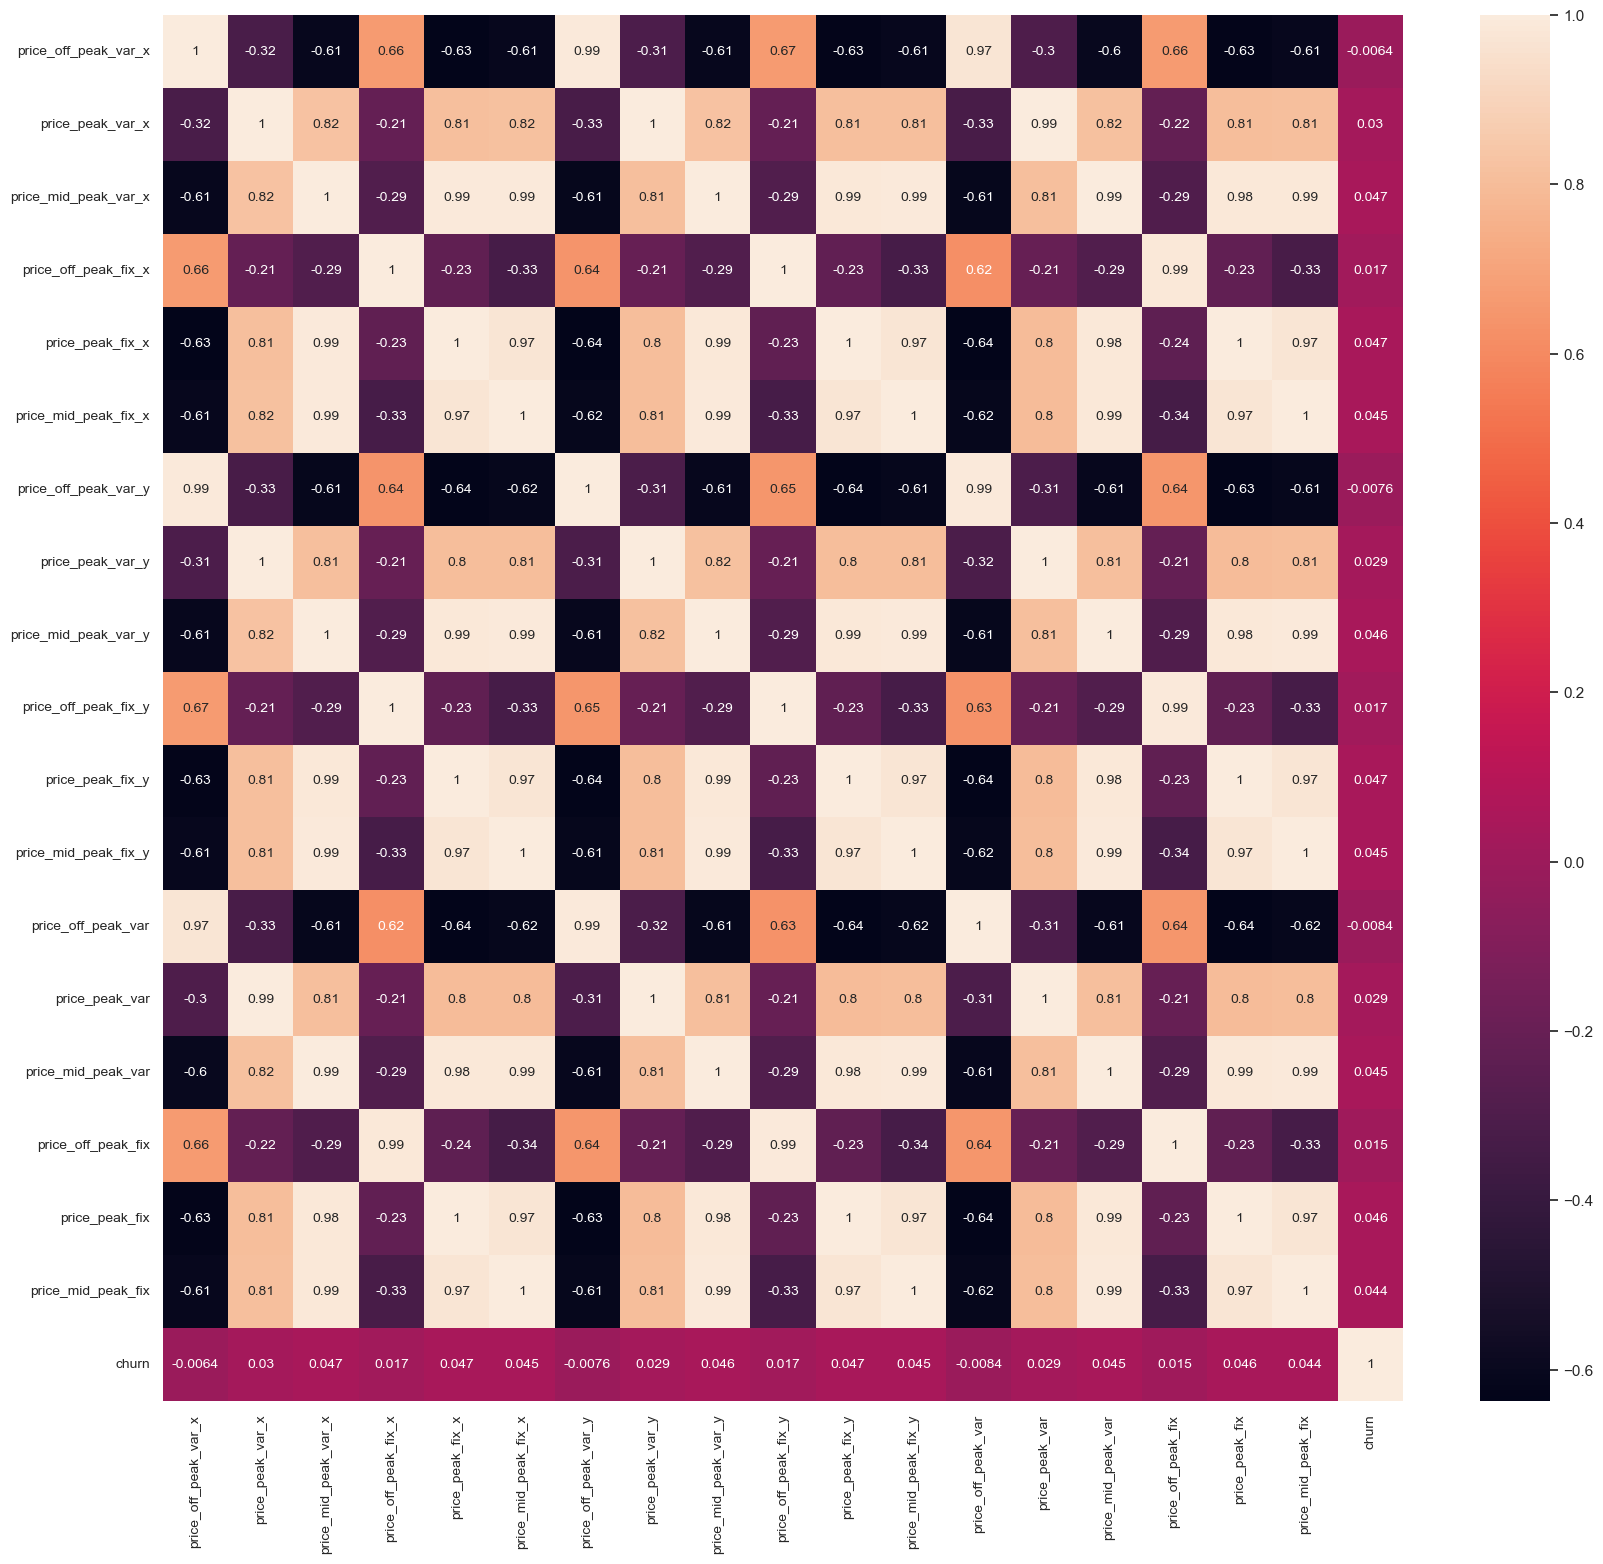

In [17]:
corr = price_churn.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### The above plot shows the correlation betweeen price variables with each other and with churn, however, the correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change.